# Lecture 12: The Normal Distribution
***

We'll need Numpy, Matplotlib, and maybe Pandas for this notebook, so let's load them. 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from scipy.stats import norm
%matplotlib inline

### Exercise 1 - Sampling from the Normal Distribution with Python 
*** 

**Part A**: Draw at least $10000$ samples from the distribution $N(0,1)$ and store the results in a variable called $z$.  Make a density histogram of $z$. Set the $x$-limits for your plot to $[-10,10]$ and your $y$-limits to $[0,0.5]$ so we can compare with the plots we'll generate in **Parts B-D**.

**Solution**: 

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


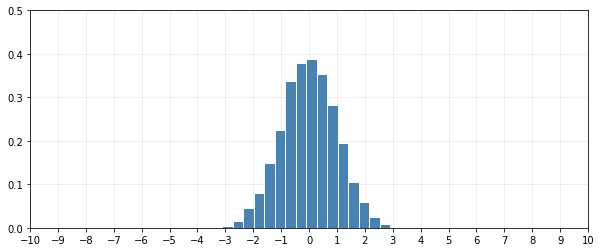

In [5]:
z = np.random.normal(size=10000)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
pd.Series(z).hist(ax=ax, bins=20, color="steelblue", normed=True, edgecolor="white")
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
plt.xticks(range(-10,10+1));
ax.set_xlim([-10,10])
ax.set_ylim([0,.5]);

**Part B**: Look back at the documentation from your function for generating samples from $N(0,1)$.  Modify your code (copy-paste) from **Part A** to draw samples from a normal distribution with parameters $\mu=3$ and $\sigma^2 = 4$, i.e. $N(3,4)$, and store the results in a variable called $x$. Make a density histogram with the same axes limits.  Does your picture seem right based on the changes to the parameters of the distribution? 

**Solution**: 

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


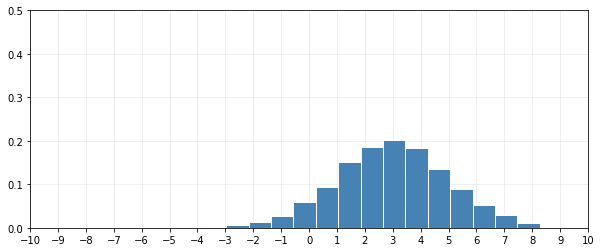

In [6]:
x = np.random.normal(3,2, size=10000)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
pd.Series(x).hist(ax=ax, bins=20, color="steelblue", normed=True, edgecolor="white")
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
plt.xticks(range(-10,10+1));
ax.set_xlim([-10,10])
ax.set_ylim([0,.5]);

**Part C**: Now suppose we are only able to sample from $N(0,1)$.  Could we take those samples and perform a simple transformation so that they're samples from $N(3,4)$? Try a few basic transformations on your array $z$ from **Part A** and store the results in a variable $y$.  Then make a density histogram of $y$ with the same axes limits (again, copy-paste).  Does your histogram based on the transformed data look like the histogram from **Part B**?  

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


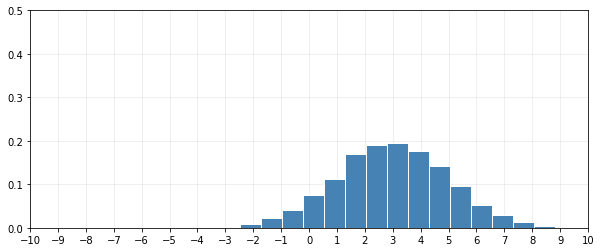

In [8]:
y = 2*z + 3 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
pd.Series(y).hist(ax=ax, bins=20, color="steelblue", normed=True, edgecolor="white")
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
plt.xticks(range(-10,10+1));
ax.set_xlim([-10,10])
ax.set_ylim([0,.5]);

**Part D**: Okey dokey, going from $N(0,1)$ to $N(3,4)$ was the easy direction, but can you go back the other way.  Can you take the $N(3,4)$ samples you have stored in $v$ from **Part B** and transform them into samples from $N(0,1)$?  Try a few transformations and store them in a variable called $v$ and make a density histogram of your transformed data . Does it look like the plot of sampled $N(0,1)$ data from **Part A**? 

**Solution**: 

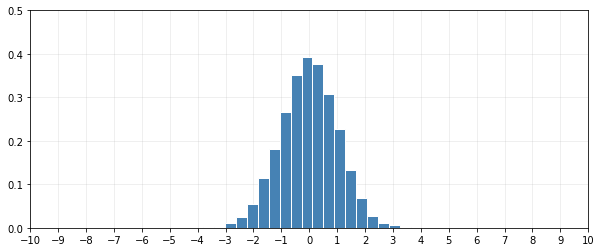

In [5]:
v = (x-3)/2
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
pd.Series(v).hist(ax=ax, bins=20, color="steelblue", normed=True, edgecolor="white")
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
plt.xticks(range(-10,10+1));
ax.set_xlim([-10,10])
ax.set_ylim([0,.5]);

**Part D**: Next let's overlay the density function for $N(3,4)$ over our histogram and check that everything looks good.  Look up the documentation for Scipy.stats's [normal random variable](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html). The object scipy.stats.norm implements all kinds of cool functions related to the normal distribution, including: pdf, cdf and ppf.  

Use the scipy.stats.norm pdf function to plot a density function overlay over your histogram from **Part C**. 

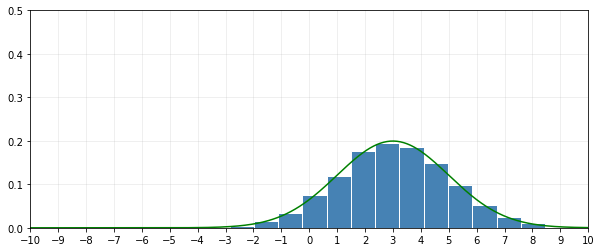

In [6]:
u = np.random.normal(3,2, size=10000)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
pd.Series(u).hist(ax=ax, bins=20, color="steelblue", normed=True, edgecolor="white")
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
plt.xticks(range(-10,10+1));
ax.set_xlim([-10,10])
ax.set_ylim([0,.5])

x = np.linspace(-10,10,500)
f = norm.pdf(x, 3, 2)
ax.plot(x,f,color="green");

### Exercise 2
*** 


Let $Z$ be a standard normal random variable, i.e. $Z \sim N(0,1)$.  

**Part A**: Use scipy.stats.norm to compute $P(Z \leq 1.25)$ and $P(Z \geq 1.25)$. 

**Solution**: We have 

In [7]:
print("P(Z \u2264 1.25) = {:.3f}".format(norm.cdf(1.25)))
print("P(Z \u2265 1.25) = {:.3f}".format(1.0 - norm.cdf(1.25)))

P(Z ≤ 1.25) = 0.894
P(Z ≥ 1.25) = 0.106


**Part B**: Use Python to find the critical value $z_\alpha$ corresponding to a tail with probability mass $0.05$.  That is, the value of $z_\alpha$ such that $P(Z \geq z_\alpha) = 0.05$. 

**Solution**: 

In [8]:
print("z_.05 = {:.3f}".format(norm.ppf(0.95)))

z_.05 = 1.645


**Part C**: Suppose you want to find $z_\alpha$ such that $P(-z_\alpha \leq Z \leq z_\alpha) = 0.95$.  What is the value of $z_\alpha$ that accomplishes this, and in particular, what is the corresponding value of $\alpha$? 

**Solution**: If we want $95\%$ of the probability between $z_\alpha$ and $-z_\alpha$ then this means we want $2.5\%$ of the probability to the right of $z_\alpha$ and $2.5\%$ of the probability to the left of $-z_\alpha$.  Thus, the critical value that we're interested in is $z_{.025}$. We can find this value using norm.ppf and setting the percentile to $97.5\%$.   

In [9]:
z025 = norm.ppf(.975)
print(r"z_.025 = {:.3f}".format(z025))

z_.025 = 1.960


Finally, we can check that $z_\alpha$ such that $P(-z_\alpha \leq Z \leq z_\alpha) = 0.95$. 

In [10]:
print("P(-1.960 \u2264 Z \u2264 1.960 ) = Phi(1.960)-Phi(-1.960) = {:.3f}".format(norm.cdf(z025)-norm.cdf(-z025)))

P(-1.960 ≤ Z ≤ 1.960 ) = Phi(1.960)-Phi(-1.960) = 0.950


### Exercise 3  
*** 

The following picture depicts a much-often spouted fact in statistics classes that roughly $68\%$ of the probability for a normal distribution falls within 1 standard deviation of the mean, roughly $95\%$ falls within two standard deviations of the mean, etc 

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/400px-Standard_deviation_diagram.svg.png)


**Part A**: Verify the first fact, that roughly $68\%$ of the probability in the standard normal distribution falls between $\mu-\sigma = -1$ and $\mu+\sigma = 1$. 


**Solution**: Let $Z$ be a random variable with standard normal distribution $N(0,1)$.  We have 

In [11]:
print("P(-1 \u2264 Z \u2264 1) = {:.4f}".format(norm.cdf(1)-norm.cdf(-1)))

P(-1 ≤ Z ≤ 1) = 0.6827


Note that for convenience, we used the standard normal distribution here.  But this relationship holds for any normal distribution.  For instance, if we let $X$ be a normal distribution with mean $\mu = 3$ and standard deviation $\sigma = 2$, then we should be able to check the probability $P(3-2 \leq X \leq 3+2) = P(1 \leq X \leq 5)$ and get the same result.  Let's check: 

In [12]:
print("P(1 \u2264 X \u2264 5) = {:.4f}".format(norm.cdf(5,loc=3,scale=2)-norm.cdf(1,loc=3,scale=2)))

P(1 ≤ X ≤ 5) = 0.6827


**Part B**: Verify the second fact, that roughly $95\%$ of the probability in the standard normal distribution falls between $\mu-2\sigma = -2$ and $\mu+2\sigma = 2$. 

In [13]:
print("P(-2 \u2264 Z \u2264 2) = {:.4f}".format(norm.cdf(2)-norm.cdf(-2)))

P(-2 ≤ Z ≤ 2) = 0.9545


Similarly, we should obtain the same result for $N(3,4)$ if we compute $P(3-2\cdot 2 \leq X \leq 3+2\cdot 2) = P(-1 \leq X \leq 7)$.

In [14]:
print("P(-1 \u2264 X \u2264 7) = {:.4f}".format(norm.cdf(7,loc=3,scale=2)-norm.cdf(-1, loc=3, scale=2)))

P(-1 ≤ X ≤ 7) = 0.9545


**Part C**: Suppose you have grades from a Calculus exam that roughly follow a normal distribution with mean $70$ and standard deviation $15$.  What percentage of the students earned C's and B's (count things like $C$-'s and $B$+'s as $C$'s and $B$'s, etc.)?

**Solution**: Let $X$ be the normal random variable with mean $\mu = 70$ and standard deviation $\sigma = 15$.  We then wish to compute $P(70 \leq X \leq 90)$.  We have 

In [15]:
print("P(70 \u2264 X \u2264 90) = {:.4f}".format(norm.cdf(90,70,15)-norm.cdf(70,70,15)))

P(70 ≤ X ≤ 90) = 0.4088


**Part D**: A common curving scheme in university courses is to set the Pass mark of a class at $\mu - 1.5\sigma$.  That is, if the overall mean of the course is low, instead of holding back people with grades of $69$ or lower, professors will lower the cutoff point to $\mu - 1.5\sigma$.  (Of course, if the mean of the course is higher than usual we don't apply this rule, because we're not monsters). If the grades at the end of a course roughly follow a normal distribution with mean $70$ and standard deviation $15$, what is the cutoff point for passing the class?  What percentage of students will pass the class?  

**Solution**: We have 

In [16]:
print("fail/pass mark = mean - 1.5 x stddev = {:.2f}".format(70-1.5*15))
print("P(X \u2265 mean - 1.5 x stddev) = {:.2f}".format(1-norm.cdf(70-1.5*15, 70, 15)))

fail/pass mark = mean - 1.5 x stddev = 47.50
P(X ≥ mean - 1.5 x stddev) = 0.93


So the fail/pass mark is $\mu - 1.5 \times \sigma = 47.5$ and $93\%$ of students achieve passing grades. 

**Part E**: Repeat the calculations you did in **Parts C** and **E** by first transforming to a standard normal distribution. 

**Solution**: For **Part C** we convert the endpoints of $70$ and $90$ to their standard normal equivalents of 

$$
70 \rightarrow \frac{70-70}{15} = 0 \quad \textrm{and} \quad 90 \rightarrow \frac{90-70}{15} = \frac{4}{3}
$$

We then have 

In [17]:
print("P(0 \u2264 Z \u2264 4/3) = {:.4f}".format(norm.cdf(4/3)-norm.cdf(0)))

P(0 ≤ Z ≤ 4/3) = 0.4088


**Solution**: For **Part D** we convert the left endpoint of $70-1.5 \times 15$ to 

$$
70 - 1.5 \times 15 \rightarrow \frac{(70-1.5 \times 15) - 70}{15} = -1.5 \quad \textrm{(Is that result mildly obvious?)}
$$

We then have 

In [18]:
print("P(X \u2265 - 1.5 ) = {:.2f}".format(1-norm.cdf(-1.5)))

P(X ≥ - 1.5 ) = 0.93


### Exercise 4  
*** 

If you have to draw samples from a normal distribution in a non-prototyping language you might have to roll your own.  Most languages provide a method for sampling from the uniform distribution $U[0,1]$. In C++, for instance, you can generate floats from $U[0,1]$ as follows

In [ ]:
#include <stdlib.h>

double uniformZeroOne()
{
    return rand() / (RAND_MAX + 1.);
}

The so-called [Box-Muller Transformation](https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform) can be used to take random draws from $U[0,1]$ and produce random draws from $N(0,1)$. Look at the Wiki page for Box-Muller and then see if you can implement it.

**Part A**: Write a function box_muller with argument size that implements the Box-Muller transformation by sampling from values in $U[0,1]$ and returns size samples from $N(0,1)$. 


In [20]:
def box_muller(size):
    u1 = np.random.uniform(size=int(size/2))
    u2 = np.random.uniform(size=int(size/2))
    z1 = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
    z2 = np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2)
    return np.concatenate((z1, z2))

**Part B**: Use your function from **Part A** to draw at least 10000 samples from $N(0,1)$ and make a histogram. Then use norm.pdf to overlay the standard normal density curve over your histogram and check your work. 

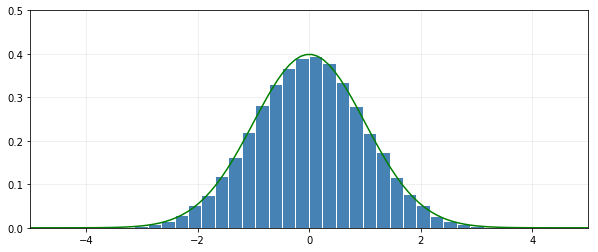

In [22]:
z = box_muller(size=50000)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
pd.Series(z).hist(ax=ax, bins=40, color="steelblue", normed=True, edgecolor="white")
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.set_xlim([-5,5])
ax.set_ylim([0,.5])
x = np.linspace(-5,5,100)
f = norm.pdf(x)
ax.plot(x, f, color="green");